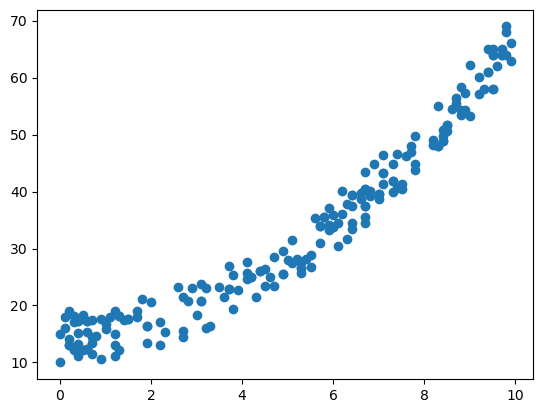

In [19]:
import numpy as np
import matplotlib.pyplot as plt
n=200
X = np.random.randint(0, 100, (n,1))/10
Y = 0.5*X**2 + 0.3*X + np.random.randint(10,20, (n,1))
plt.scatter(X, Y)
plt.show()

In [42]:
features = np.array([lambda _: 1,
                     lambda x: x,
                     lambda x: x**2,
                     lambda x: x**3])

In [ ]:
alpha  = 0.000001
W = np.zeros((len(features),1))
epochs = 90000
for _ in range(epochs):
    phi = np.matrix([[f(x) for f in features] for [x] in X])
    phi_w = np.matmul(phi, W)
    error = Y - phi_w
    gradient = -2 * np.matmul(phi.T, error)
    W -= alpha * gradient
print(W)
print(np.linalg.norm(gradient))

In [43]:
from math import isnan
alpha  = 1
keepGoing = True
while keepGoing:
    print("trying with alpha =", alpha)
    W = np.zeros((len(features),1))
    norm = 1
    while norm>0.1:
        phi = np.matrix([[f(x) for f in features] for [x] in X])
        phi_w = np.matmul(phi, W)
        error = Y - phi_w
        gradient = -2 * np.matmul(phi.T, error)
        norm = np.linalg.norm(gradient)
        W -= alpha * gradient
        if isnan(norm):
            break
    if norm<=0.1:
        keepGoing = False
    else:
        print("alpha is too big\n")
        alpha /= 2
print("\nweights vector: ", W)
print("gradient size:", np.linalg.norm(gradient))

trying with alpha = 1
trying with alpha = 0.5
trying with alpha = 0.25
trying with alpha = 0.125
trying with alpha = 0.0625
trying with alpha = 0.03125
trying with alpha = 0.015625
trying with alpha = 0.0078125


C:\Users\gioan\AppData\Local\Temp\ipykernel_14912\348745014.py:12: RuntimeWarning: overflow encountered in matmul
  gradient = -2 * np.matmul(phi.T, error)
C:\Users\gioan\AppData\Local\Temp\ipykernel_14912\348745014.py:10: RuntimeWarning: invalid value encountered in matmul
  phi_w = np.matmul(phi, W)
C:\Users\gioan\AppData\Local\Temp\ipykernel_14912\348745014.py:10: RuntimeWarning: overflow encountered in matmul
  phi_w = np.matmul(phi, W)


trying with alpha = 0.00390625
trying with alpha = 0.001953125
trying with alpha = 0.0009765625
trying with alpha = 0.00048828125
trying with alpha = 0.000244140625
trying with alpha = 0.0001220703125
trying with alpha = 6.103515625e-05
trying with alpha = 3.0517578125e-05
trying with alpha = 1.52587890625e-05
trying with alpha = 7.62939453125e-06
trying with alpha = 3.814697265625e-06
trying with alpha = 1.9073486328125e-06
trying with alpha = 9.5367431640625e-07
trying with alpha = 4.76837158203125e-07
trying with alpha = 2.384185791015625e-07
trying with alpha = 1.1920928955078125e-07
trying with alpha = 5.960464477539063e-08
trying with alpha = 2.9802322387695312e-08


KeyboardInterrupt: 

In [44]:
print(W)
print(norm)

[[1.41499842e+01]
 [9.64326813e-01]
 [3.10943039e-01]
 [1.24372050e-02]]
13.758051315528014


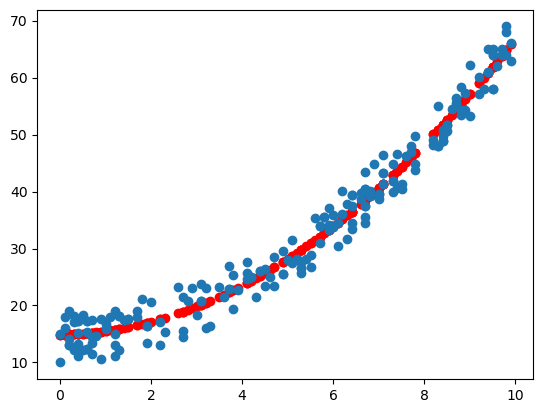

In [41]:
Z = [sum([w*f(x) for w,f in zip(W,features)]) for x in X]
plt.scatter(X, Z, c
            olor="red")
plt.scatter(X, Y)
plt.show()